In [24]:
# top 10 songs 
# go through the dictionary and create a counter of the top10 songs tokens


from collections import Counter
import math, glob, csv, re, numpy
from matplotlib import pyplot
import json
from collections import defaultdict
import os
import fnmatch

In [25]:
def find_all(name, path):
    l=[]
    for filename in os.listdir(path):
#         print (filename)
        if fnmatch.fnmatch(filename,"*"+name+"*"):
            l.append(filename)
    print (l)
    return l

In [26]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.split(",")
            word=word.rstrip()## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [27]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score

#longer paragraphs arent overweighted

In [28]:
word_weights = load_word_weights("bingliu.csv")

In [29]:
# import pandas as pd
# data = pd.read_csv("top10.csv")

import csv

from collections import defaultdict

top10dict=defaultdict(list)
input_file = csv.DictReader(open("top10.csv"))
for row in input_file:
    top10dict[row["author"]].append({"album":row["album"],"song":row["song"],"year":row["year"],"list_count":row["listen_count"]})

In [30]:
filenames=find_all('Tyler,TheCreator',"../")

['Lyrics_Tyler,TheCreator{.Golbin.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json', 'Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Wolf.json']


In [31]:
def load_album(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    with open(text_file) as json_file:
        data = json.load(json_file)
#         print (type(data))
    ## here's where we actually read the file
#     with open(text_file, encoding="utf-8") as file:
#         print (type(file))
        ## This block reads a file line by line.
        for line in data["songs"]:
#             print (line)
#             print (type(line))
#             print (line[0])
            title=line['title']
            album=line['album']
            line = line['lyrics'].rstrip()
#             print (line)
            tokens = word_pattern.findall(line)
#             print (tokens)
#             ## turn a list into a word->count map
            paragraph_counts = Counter(tokens)
        
#             ## create the paragraph object, with the original text, 
#             ##  the word counts, and the total score.
#             print (line['title'])
            paragraphs.append({'title': title,'album':album,'text': line, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })

    return paragraphs

In [58]:
#all albums for the artist

def load_artist(artist):
    
    complete=[]
    filenames=find_all(artist,"../")
    
    
    for file in filenames:
         complete.extend(load_album("../"+file))
            
    return complete

In [59]:
complete_sentiment=load_artist("Tyler,")
complete_sentiment

['Lyrics_Tyler,TheCreator{.Golbin.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json', 'Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Wolf.json']


[{'title': 'Goblin',
  'album': 'Goblin',
  'text': 'You wouldn\'t do that Tyler, kill yourself or anyone. You don\'t even have the balls to begin with. What you need is me, someone to talk to, uh, it\'s been a while since our last session. So, tell me what\'s been going on\n\nI\'m not a fucking role model (I know this)\nI\'m a 19 year old fucking emotional coaster with pipe dreams\nSince Kanye tweeted telling people he\'s bumping all of my shit\nThese mothafuckas think I\'m \'sposed to live up to something? Shit\nI\'m still jacking off and proceeding my life careless\nBut getting more pussy \'cause I tell bitches I\'m Wood Harris (as you should)\nPhilly to Paris, I\'m getting these weird stares\nAt skateparks and airports all in a year, it\'s weird\nYonkers dropped and left them craniums mindfucked\nNow competition missing like that nigga my mom fucked\nHe still hasn\'t called me yet (that\'s not your fault)\nBut that\'s a whole fucking different argument, shit, I got over it\nAnd a c

In [68]:
top10=[]

# print (top10dict)
for x in top10dict["Tyler, The Creator"]:
    for y in complete_sentiment:
        if y['title']==x['song']:
            y['play_count']=x["list_count"]
            top10.append(y)
top10

[{'title': 'EARFQUAKE',
  'album': 'IGOR',
  'text': "For real, for real this time\nFor real, for real, for real this time\nBitch, I cannot fall short\nFor real, for real, for real this time (Yeah, yeah)\nFor real, for real, for real this time\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n'Cause you make my earth quake\nOh, you make my earth quake (Earthquake, ooh)\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n\nDon't leave, it's my fault\nDon't leave, it's my fault\nDon't leave, it's my fault (Girl)\n’Cause when it all comes crashing down I’ll need you\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, you’re telling me something is bad\nAnd it's making my heart break\n'Cause you make my earth quake, oh, you make my earth quake\n(Earth quake, yeah)\nRiding around, your love be shakin' me up\nAnd it’s making my heart break (You already k

[{'title': 'EARFQUAKE', 'album': 'IGOR', 'text': "For real, for real this time\nFor real, for real, for real this time\nBitch, I cannot fall short\nFor real, for real, for real this time (Yeah, yeah)\nFor real, for real, for real this time\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n'Cause you make my earth quake\nOh, you make my earth quake (Earthquake, ooh)\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n\nDon't leave, it's my fault\nDon't leave, it's my fault\nDon't leave, it's my fault (Girl)\n’Cause when it all comes crashing down I’ll need you\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, you’re telling me something is bad\nAnd it's making my heart break\n'Cause you make my earth quake, oh, you make my earth quake\n(Earth quake, yeah)\nRiding around, your love be shakin' me up\nAnd it’s making my heart break (You already know)

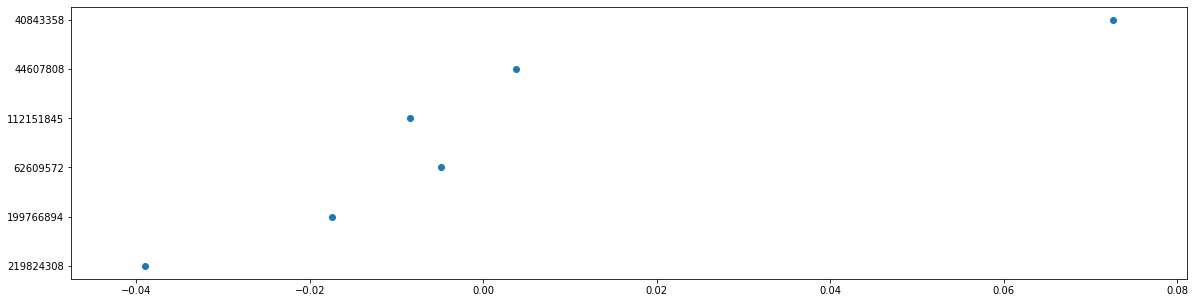

array([-0.03896104, -0.01746725, -0.00483092, -0.00843882,  0.00380228,
        0.07261411])

In [86]:
# print (top10)
sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
print (sorted_songs_artist)
play_count = numpy.array([x['play_count'] for x in sorted_songs_artist])
print (play_count)
score_count = numpy.array([x['score'] for x in sorted_songs_artist])
print (score_count)
pyplot.figure(figsize=(20, 5))
pyplot.scatter(score_count,play_count)
pyplot.show()

score_count